In [3]:
from pylab import *
from matplotlib.colors import LogNorm
import numpy
import scipy.ndimage
import matplotlib.patches as patches

(1000,)


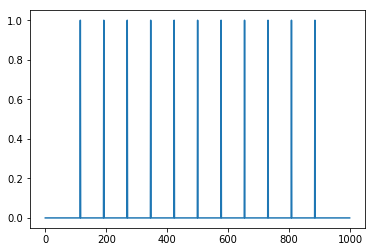

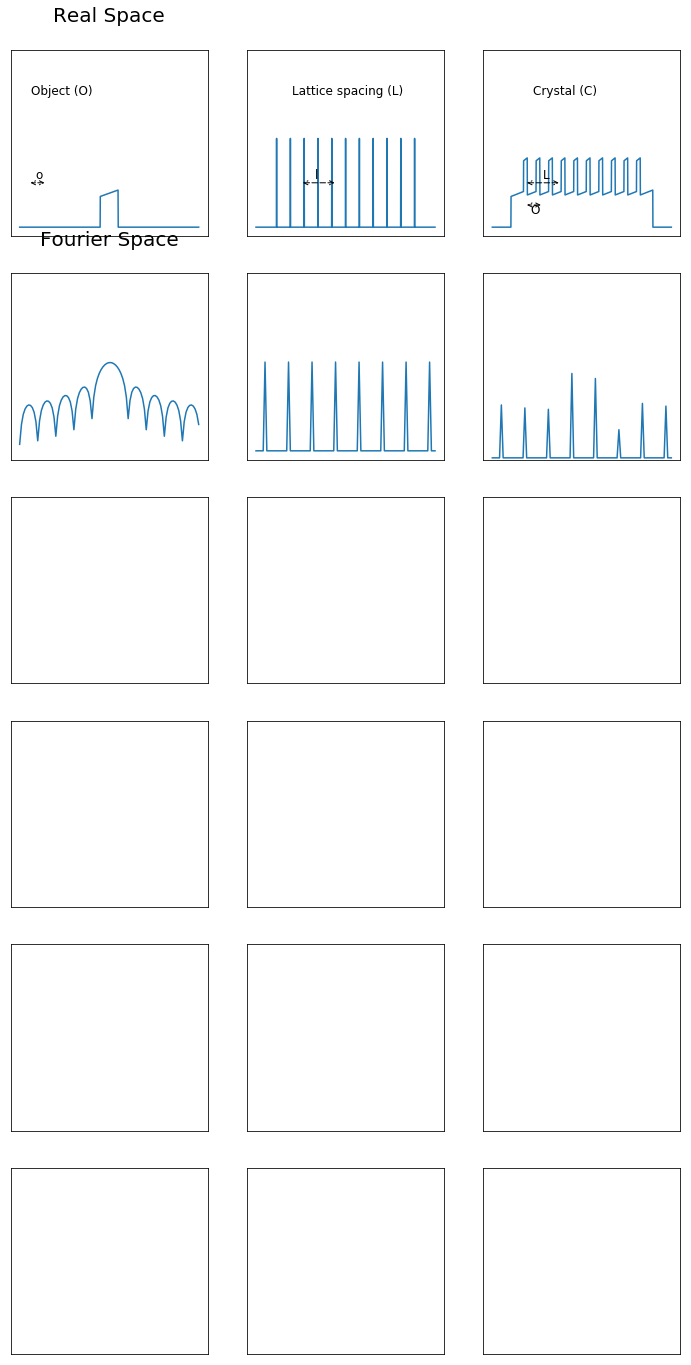

In [73]:
a = numpy.sin(2*numpy.pi*arange(1000)/2000/4)#random(1000)/10+1
critical = zeros(1000)
oversampling = zeros(1000)
undersampling= zeros(1000)

S = {0:critical,1:oversampling,2:undersampling}
Srate = {0:10,1:5,2:13}
for s in range(3):
    for i in arange(0,1000,Srate[s]):
        S[s][i] = 1

b = S[2]
print b.shape
x = 450
a[:x] = 0
a[-x:] = 0
particle = a[450:-450]

diff = fft(a)
intensities = log10(100*fftshift(abs(diff)**2))

sample = sampling_four2real(b,2500)
    
plot(sample)
show()

c = zeros_like(b)
for i in range(1,1000):
    if sample[i] > 0:
        c[i-50:i+50] = particle

        
zz = zeros(1000)        
zz[450:-450] = 1
sinc_func = numpy.sinc( numpy.linspace(-15, 15, 1000) )

fig,ax = subplots(6,3,figsize=(12,24))
#fig.tight_layout()
for axs in ax:
    for a0 in axs:
        a0.set_yticks([])
        a0.set_xticks([])

        
ax[0][0].plot(a)
ax[0][0].set_title("Real Space\n",fontsize=20)
ax[0][0].set_ylim([-0.1,2])

ax[0][1].plot(sample);
ax[0][1].set_ylim([-0.1,2])


ax[0][2].plot( convolve(particle,sample)); 
ax[0][2].set_ylim([-0.1,2])


ax[1][0].plot(intensities[450:-450])
ax[1][0].set_title("Fourier Space\n",fontsize=20)
ax[1][0].set_ylim([-0.1,10])

ax[1][1].plot((b)[450:-450])
ax[1][1].set_ylim([-0.1,2])


ax[1][2].plot( (b*intensities)[450:-450]); 
ax[1][2].set_ylim([-0.1,10])



"""
ax[3][0].plot( ( sinc_func[1:-1] )); 
ax[3][1].plot(zz); 
ax[3][0].set_title(r'$\circled{*}$',fontsize=20)
ax[3][0].set_ylim([-0.3,2])


ax[4][0].plot( intensities[450:-450] )
ax[4][1].plot(a[400:-400]); 
ax[4][1].set_ylim([-0.1,2])
ax[4][0].set_ylim([-0.1,10])

ax[1][0].text(25, 1.5,'Sampling rate (S)', fontsize=12)
ax[2][0].text(20, 8,'Measured Signal (M)', color='black', fontsize=12)
ax[4][0].text(20, 8,'Recovered Signal (R)', color='black', fontsize=12)
"""
ax[0][0].text(65, 1.5,'Object (O)', color='black', fontsize=12)
ax[0][1].text(200, 1.5,'Lattice spacing (L)', color='black', fontsize=12)
ax[0][2].text(250, 1.5,'Crystal (C)', color='black', fontsize=12)
#ax[4][1].text(35, 1.5,r'Recovered object ($\rho$)', color='black', fontsize=12)

ax[0][0].text(90, 0.55,'o', color='black', fontsize=12)
ax[0][1].text(330, 0.55,'l', color='black', fontsize=12)



#ax[0][2].text(1050, 4,'Crystallization', color='black', rotation=-90, fontsize=20,
#        bbox=dict(facecolor='none',edgecolor='white'))
#ax[1][2].text(-25, -4,'Computational', color='black', rotation=90, fontsize=20,
#        bbox=dict(facecolor='none',edgecolor='white'))


p = patches.Rectangle(
        (1000 , -0.1),
        200,
        7.,
        linestyle='dashdot',
        fill=False,
        zorder=1000
    )

p.set_clip_on(False)
#ax[0][2].add_patch(p)
p = patches.Rectangle(
        (-30 , 10),
        20,
        -34.2,
        linestyle='dashdot',
        fill=False,
        zorder=1000
    )

p.set_clip_on(False)
#ax[0][2].add_patch(p)




ax[0][0].annotate(s='', xy=(49,.5), xytext=(150,.5), arrowprops=dict(arrowstyle='<->',linestyle='dashed'))
ax[0][1].annotate(s='', xy=(250,.5), xytext=(450,.5), arrowprops=dict(arrowstyle='<->',linestyle='dashed'))
ax[0][2].annotate(s='', xy=(200,.5), xytext=(420,.5), arrowprops=dict(arrowstyle='<->',linestyle='dashed'))
ax[0][2].text(310, 0.55,'L', color='black', fontsize=12)
ax[0][2].annotate(s='', xy=(200,.25), xytext=(310,.25), arrowprops=dict(arrowstyle='<->',linestyle='dashed'))
ax[0][2].text(235, 0.15,'O', color='black', fontsize=12)
savefig('SamplingTheory.png',dpi=300)
show()


In [78]:

ifft(fft(a))-a


array([  1.12093629e-14 +2.60052240e-16j,
        -1.25180702e-15 +1.13782164e-17j,
        -1.45095814e-15 -1.01646901e-15j,
        -1.13800638e-15 -1.37335079e-15j,
        -1.86348545e-15 -1.04091401e-15j,
        -2.47516388e-15 -2.05194997e-15j,
        -1.43673306e-15 -1.78417239e-15j,
        -1.80658513e-15 -1.95782541e-15j,
        -9.38855266e-16 -2.49527090e-15j,
        -1.69278450e-15 -3.51420946e-16j,
        -1.42250798e-16 -1.86920497e-16j,
         3.76964615e-16 -6.76740481e-16j,
        -5.69003192e-17 -7.57135359e-16j,
        -1.50785846e-15 -2.15219370e-15j,
         2.84501596e-17 -1.43412565e-15j,
         3.76964615e-16 -9.10050801e-16j,
         1.42250798e-17 -2.05963477e-15j,
        -1.18068162e-15 -2.41710138e-15j,
        -9.95755586e-17 +5.72798750e-16j,
         5.97453351e-16 -1.08658347e-15j,
        -3.27176835e-16 -1.11259305e-15j,
         3.98302234e-16 -1.62860481e-15j,
        -3.69852075e-16 -1.28101690e-15j,
        -6.25903511e-16 -1.2419319

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        8.62589031,  8.47477038,  9.43995394,  8.47712573,  8.72400251,
        8.28292569,  9.45125573,  8.96190931,  9.46224737,  8.32827286,
        9.89961227,  9.49421892,  9.98935244,  9.06063499,  8.64472449,
        9.25208622,  9.24040836,  8.65389298,  8.18582726,  9.27884378,
        8.14725829,  8.03075915,  9.27553866,  9.56384492,  9.4331433 ,
        9.0654417 ,  9.13083262,  8.26971837,  8.90638754,  9.67854253,
        8.84511569,  9.69749836,  8.55838416,  9.55854499,  8.88526973,
        8.2212678 ,  8.5261056 ,  8.9956185 ,  9.08192506,  9.72132434,
        9.07155599,  9.19778163,  9.20759968,  9.87333523,  9.99638303,
        8.1357689 ,  9.92736183,  9.15265525,  9.40091864,  9.37634125,
        9.66588434,  8.48642693,  8.88896317,  8.16742367,  9.65706304,
        9.318315  ,  9.59641004,  9.38750688,  9.90713251,  8.11